# Lab 03 - PCA

As seen in during class, PCA is a technique for dimensionality reduction and explanation of variance. In this lab, your task is to recreate the visual work in class and show how you are able to apply the technique to a previously-unseen dataset.

### Data
There are three datasets for this lab:
- The ​Wisconsin Diagnostic Breast Cancer​ (WDBC) dataset
- The [Gisette](https://archive.ics.uci.edu/ml/datasets/Gisette) dataset
- The [Dorothea](https://archive.ics.uci.edu/ml/datasets/Dorothea) dataset

### Process
Your implementation must:
- Read the data from and apply PCA to two of the datasets: the WDBC dataset and EITHER the Gisette or Dorothea dataset
- Optionally apply a normalisation technique to the data
- Show how instances and classes are related in the datasets
- Show the percentage of variance explained, starting from the first principal component

### DDL
- Feb 10


-----------

## 1. In class about WDBC

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [40]:
df = pd.read_csv('wdbc.data', header = None)
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [41]:
column_labels = ['patient_id', 'diagnosis', 'mean radius', 'mean texture', 'mean perimeter', 'mean area',
'mean smoothness', 'mean compactness', 'mean concavity',
'mean concave points', 'mean symmetry', 'mean fractal dimension',
'radius error', 'texture error', 'perimeter error', 'area error',
'smoothness error', 'compactness error', 'concavity error',
'concave points error', 'symmetry error',
'fractal dimension error', 'worst radius', 'worst texture',
'worst perimeter', 'worst area', 'worst smoothness',
'worst compactness', 'worst concavity', 'worst concave points',
'worst symmetry', 'worst fractal dimension']
df.columns = column_labels
df

,patient_id,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [42]:
df.head(5)

,patient_id,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [43]:
df['diagnosis'].replace('B', 'Benign', inplace = True)
df['diagnosis'].replace('M', 'Malignant', inplace = True)
df

,patient_id,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,842302,Malignant,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,Malignant,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,Malignant,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,Malignant,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,Malignant,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,Malignant,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,Malignant,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,Malignant,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,Malignant,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [44]:
df.diagnosis.unique()
df.diagnosis.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Name: diagnosis, Length: 569, dtype: bool

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
feature_df = df.iloc[:,2:]
label_df = df.iloc[:,1]
feature_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [47]:
# x = feature_df.values
x = StandardScaler().fit_transform(feature_df)
x

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [48]:
np.mean(x), np.std(x)

(1.2487570048507913e-18, 1.0)

### 1.1 PCA

In [49]:
from sklearn.decomposition import PCA

pca_breast = PCA(n_components = 2)

In [50]:
principal_components_breast = pca_breast.fit_transform(x)
principal_breast_df = pd.DataFrame(
    data=principal_components_breast, columns=['PC1', 'PC2'])

In [51]:
pca_breast.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [52]:
principal_components_breast

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

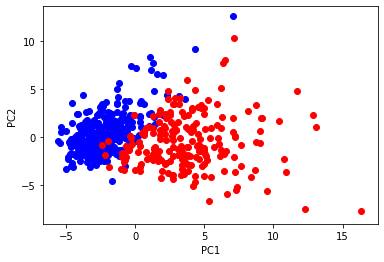

In [53]:
plt.figure()
plt.xlabel('PC1')
plt.ylabel('PC2')
targets = ['Benign', 'Malignant']
colors = ['b', 'r']
for target, color in zip(targets, colors):
    indicesToKeep = label_df == target
    plt.scatter(principal_breast_df.loc[indicesToKeep, 'PC1'],
                principal_breast_df.loc[indicesToKeep, 'PC2'],
                c = color)

In [54]:
pca = PCA().fit(x)
evr = pca.explained_variance_ratio_
print('\n'.join('{:2d}:{:0.4f}'.format(*k) for k in enumerate (evr)))

 0:0.4427
 1:0.1897
 2:0.0939
 3:0.0660
 4:0.0550
 5:0.0402
 6:0.0225
 7:0.0159
 8:0.0139
 9:0.0117
10:0.0098
11:0.0087
12:0.0080
13:0.0052
14:0.0031
15:0.0027
16:0.0020
17:0.0018
18:0.0016
19:0.0010
20:0.0010
21:0.0009
22:0.0008
23:0.0006
24:0.0005
25:0.0003
26:0.0002
27:0.0001
28:0.0000
29:0.0000


Text(0.5, 0, 'Number of components')

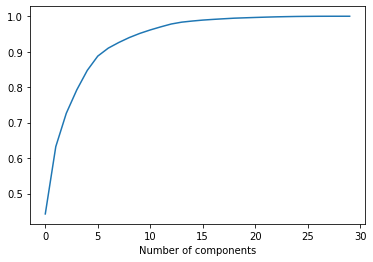

In [55]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')

## GISETTE

In [68]:
df = pd.read_csv('gisette_valid.data', header = None, delimiter=' ')
df

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
0,688,0,0,0,0,0,0,952,0,870,...,0,0,0,0,0,494,0,769,0,NaN
1,778,758,0,0,0,0,0,708,0,991,...,0,0,770,0,0,0,0,0,0,NaN
2,469,0,816,0,0,0,0,0,0,0,...,0,0,467,0,0,0,417,0,0,NaN
3,0,0,0,0,0,571,991,983,0,983,...,0,0,0,0,0,0,0,0,0,NaN
4,0,0,0,0,0,0,0,949,0,991,...,0,0,0,0,0,0,0,976,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,511,0,0,0,0,0,0,0,0,...,0,0,852,0,0,0,0,0,0,NaN
996,0,0,599,0,0,0,0,910,0,0,...,0,0,0,0,0,0,0,0,707,NaN
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,742,NaN
998,0,0,0,0,0,0,0,968,0,0,...,0,0,773,0,0,0,0,0,0,NaN


In [69]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
0,688,0,0,0,0,0,0,952,0,870,...,0,0,0,0,0,494,0,769,0,NaN
1,778,758,0,0,0,0,0,708,0,991,...,0,0,770,0,0,0,0,0,0,NaN
2,469,0,816,0,0,0,0,0,0,0,...,0,0,467,0,0,0,417,0,0,NaN
3,0,0,0,0,0,571,991,983,0,983,...,0,0,0,0,0,0,0,0,0,NaN
4,0,0,0,0,0,0,0,949,0,991,...,0,0,0,0,0,0,0,976,0,NaN


In [71]:
df = df.iloc[:, :-1]
x = StandardScaler().fit_transform(df)
x

array([[ 2.15078851, -0.10731871, -0.52764967, ...,  0.58704976,
        -0.16965916,  2.32824596],
       [ 2.48165642,  9.36712572, -0.52764967, ..., -0.65175869,
        -0.16965916, -0.39939552],
       [ 1.34567658, -0.10731871,  1.79905922, ..., -0.65175869,
         3.3714525 , -0.39939552],
       ...,
       [-0.3785129 , -0.10731871, -0.52764967, ..., -0.65175869,
        -0.16965916, -0.39939552],
       [-0.3785129 , -0.10731871, -0.52764967, ..., -0.65175869,
        -0.16965916, -0.39939552],
       [-0.3785129 , -0.10731871, -0.52764967, ...,  1.73558066,
        -0.16965916, -0.39939552]])

In [72]:
from sklearn.decomposition import PCA

pca_breast = PCA(n_components = 2)

In [73]:
principal_components_breast = pca_breast.fit_transform(x)
principal_breast_df = pd.DataFrame(
    data=principal_components_breast, columns=['PC1', 'PC2'])

In [74]:
pca_breast.explained_variance_ratio_

array([0.03160206, 0.02577817])

In [75]:
principal_components_breast

array([[-1.05150984, -7.12427255],
       [-8.95672162, 13.38070139],
       [ 2.11558136, 16.9125036 ],
       ...,
       [-2.87461651, 13.17326018],
       [-4.69838581, -8.49938102],
       [-2.5480521 , -3.01906103]])

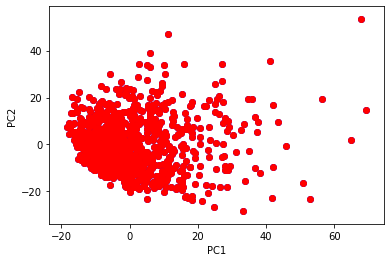

In [83]:
plt.figure()
plt.xlabel('PC1')
plt.ylabel('PC2')
# targets = ['Benign', 'Malignant']
colors = ['b', 'r']
# for target, color in zip(targets, colors):
#     indicesToKeep = label_df == target
#     plt.scatter(principal_breast_df.loc[indicesToKeep, 'PC1'],
#                 principal_breast_df.loc[indicesToKeep, 'PC2'],
#                 c = color)
for color in colors :
    plt.scatter(principal_breast_df.loc[:, 'PC1'],
                principal_breast_df.loc[:, 'PC2'],
                c = color)

In [84]:
pca = PCA().fit(x)
evr = pca.explained_variance_ratio_
print('\n'.join('{:2d}:{:0.4f}'.format(*k) for k in enumerate (evr)))

 0:0.0316
 1:0.0258
 2:0.0200
 3:0.0177
 4:0.0134
 5:0.0127
 6:0.0115
 7:0.0093
 8:0.0086
 9:0.0079
10:0.0073
11:0.0071
12:0.0068
13:0.0065
14:0.0058
15:0.0055
16:0.0053
17:0.0051
18:0.0050
19:0.0048
20:0.0044
21:0.0044
22:0.0043
23:0.0042
24:0.0041
25:0.0039
26:0.0038
27:0.0037
28:0.0035
29:0.0035
30:0.0033
31:0.0033
32:0.0032
33:0.0031
34:0.0031
35:0.0030
36:0.0030
37:0.0029
38:0.0029
39:0.0028
40:0.0028
41:0.0028
42:0.0027
43:0.0027
44:0.0026
45:0.0026
46:0.0025
47:0.0025
48:0.0025
49:0.0024
50:0.0024
51:0.0024
52:0.0023
53:0.0023
54:0.0023
55:0.0023
56:0.0022
57:0.0022
58:0.0022
59:0.0021
60:0.0021
61:0.0021
62:0.0021
63:0.0021
64:0.0021
65:0.0021
66:0.0020
67:0.0020
68:0.0020
69:0.0020
70:0.0019
71:0.0019
72:0.0019
73:0.0019
74:0.0019
75:0.0019
76:0.0019
77:0.0019
78:0.0018
79:0.0018
80:0.0018
81:0.0018
82:0.0018
83:0.0018
84:0.0018
85:0.0018
86:0.0017
87:0.0017
88:0.0017
89:0.0017
90:0.0017
91:0.0017
92:0.0017
93:0.0017
94:0.0017
95:0.0017
96:0.0016
97:0.0016
98:0.0016
99:0.0016


Text(0.5, 0, 'Number of components')

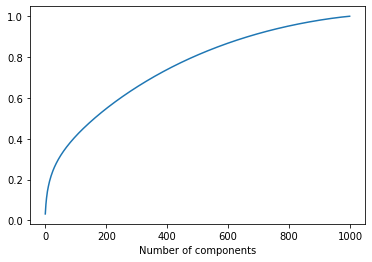

In [85]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')